<a href="https://colab.research.google.com/github/stephenbeckr/time-series-class/blob/main/Code/SurvivalGuideToR_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Short introduction to the `R` programming language

This is taken from a similar handout prepared by Prof. Manuel Lladser when he taught time series in Spring 2020 (but all typos and mistakes are most likely mine -- Stephen Becker)

## Basic distrubtions
Some of the basic distributions in R are: 

**Discrete**
- Binomial (`binom`) with parameters $n$ and $p$
  - Bernoulli is the special case $n=1$
  - Multinomial (`multinom`) is a generalization
- Negative Binomial (`nbinom`) with parameters $\alpha$ and $p$
- Poisson (`pois`) with parameter $\lambda$
- Uniform (`unif`) on some set $\{1,2,\ldots,k\}$
- Geometric (`geom`) 


**Continuous**
- Normal (`norm`) with mean $\mu$ and variance $\sigma^2$
- Exponential (`exp`) with parameter $\lambda$
- Gamma (`gamma`) with parameters $\alpha$ and $\lambda$
- chi-squared (`chisq`) with $\nu$ degrees of freedom
- Uniform (`unif`) on some interval $[a,b]$

For the complete list of distributions type `help(distribution)`.

What can you do with distributions?
#### Drawing random samples from a distrbution
The syntax to simulate a distribution is: `rNAME(NUMBER,PARAMETERS)`. Here “r” stands for “random” and `NAME` is any of R’s known distributions. `NUMBER` is the total number of simulations of the distribution under the given `PARAMETERS`

**Example**
To simulate 20 independent Binomial random variables with parameters $n = 5$ (SIZE parameter) and $p = 0.2$ (PROB parameter) write in the console: `rbinom(20,5,0.2)`. 

To remember what each parameter represents write: `rbinom()` and note the clue at the bottom of the console. And if you need extra clarification, write: `help(rbinom)`.

In [6]:
rbinom(20,5,.2)

[1] 1 1 0 0 0 1 2 1 1 2 3 0 1 0 4 0 0 1 2 0

In [22]:
table(rbinom(20,5,.2))  # build a contingency table of the counts


0 1 2 4 
6 8 5 1 

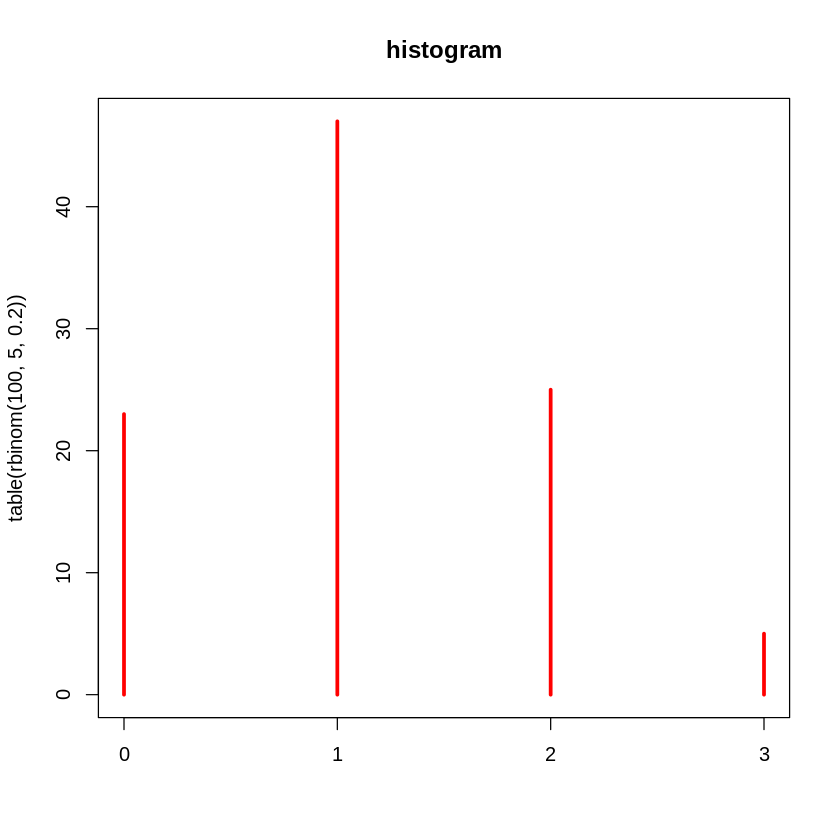

In [31]:
plot(table(rbinom(100,5,.2)),lwd=3,col="red",type = "h",  main = "histogram")

#### Evaluating probability density/mass functions
To evaluate a p.d.f. or p.m.f. of a distribution at certain x use: `dNAME(x,PARAMETERS)`. Here “d” stands for “distribution”. For discrete distributions this is interpreted as the probability mass function (p.m.f.), but for continuous as the probability density function (p.d.f.)

**Example** To evaluate the p.d.f. of an Exponential with rate parameter $\lambda = 0.2$ at $x = 7.345$ write: `dexp(7.345,0.2)`. 

**Example** To evaluate the p.m.f. of a Poisson with rate $\lambda = 0.2$ at $x = 3$ write: `dpois(3,0.2)`.

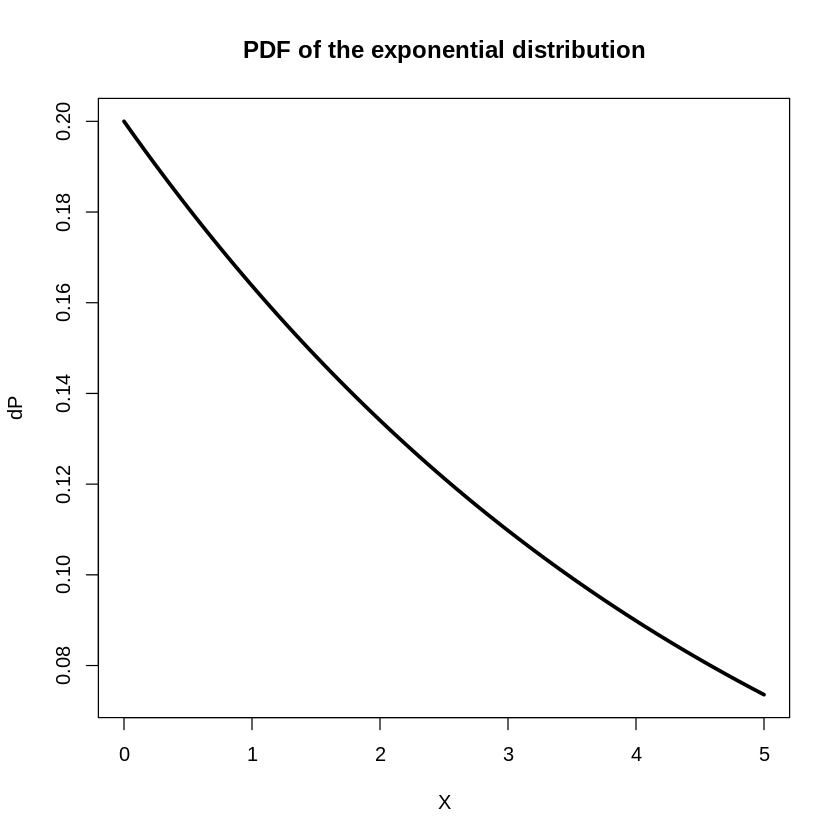

In [29]:
expPdf <- function(x){ dexp(x,0.2) }
plot( expPdf, xlab="X",ylab="dP",lwd=3,main="PDF of the exponential distribution", xlim=c(0,5) )

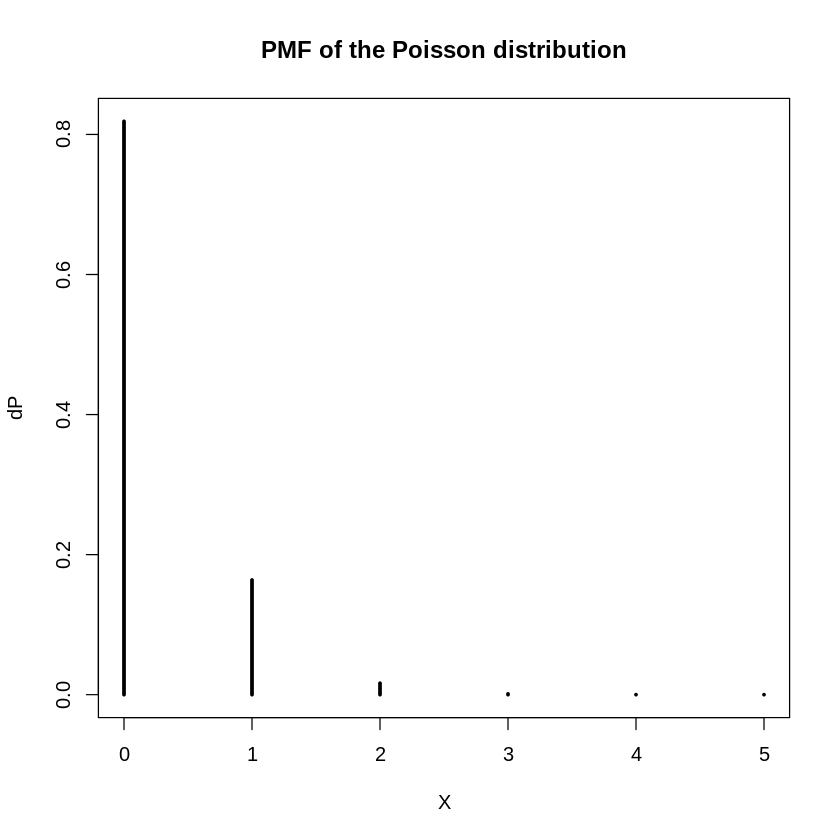

In [28]:
poissPdf <- function(x){ dpois(x,0.2) }
x = seq(0,8)
y = poissPdf(x)
plot( x, y, xlab="X",ylab="dP",type='h',lwd=3,main="PMF of the Poisson distribution", xlim=c(0,5) )

#### Evaluating cumulative distribution functions
To evaluate the c.d.f. of a random variable at certain value x use: `pNAME(x,PARAMETERS)`.

**Example** To evaluate the c.d.f. of a Geometric with parameter $p = 0.5$ at $x = 5$ write: `pgeom(5,0.5)`.

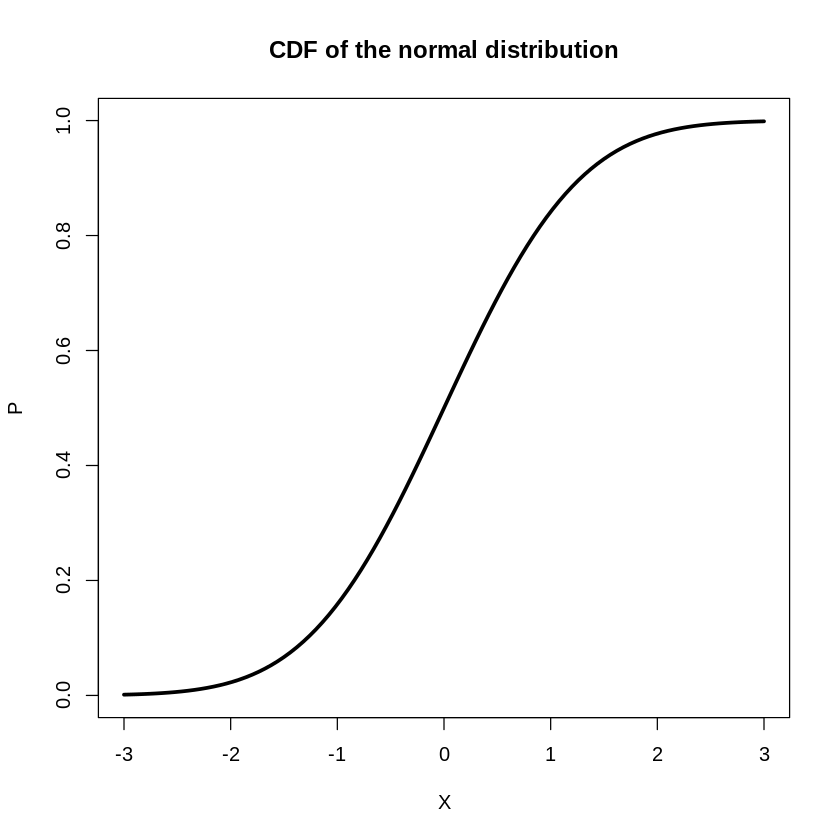

In [32]:
normalCdf <- function(x){ pnorm(x) }
plot( normalCdf, xlab="X",ylab="P",lwd=3,main="CDF of the normal distribution", xlim=c(-3,3) )

## Functions
**Example**. The following function returns the distance (d) between a point (x,y) and the origin (0,0): `d <- function(x,y){sqrt(x^2 + y^2)}`. To determine how far is the point (3, 4) from the origin then just enter: `d(3, 4)`.

In [34]:
d <- function(x,y){sqrt(x^2 + y^2)}
d(3,4)

[1] 5

A function may return several values.

**Example** To simultaneously compute the arithmetic and geometric mean of a pair of numbers $x$ and $y$, define: `means <- function(x,y){return( c((x+y)/2,(x*y)∧0.5) )}`. In R, `c()` is used to define a sequence of numbers.

In [37]:
means <- function(x,y){return( c((x+y)/2,(x*y)^0.5) )}
means(2,8)

[1] 5 4

## Plotting
Plots can be done with either (a) functions, or (b) data.

For (a) functions, plot as `plot( FUNCTION, xlim=c(LOWER,UPPER), ... )`

For (b) data/sequences, plot as `plot( X, Y, ... )` (or just `plot(Y)` to use the default of `X` being 1, 2, ..., n)

The `...` are more options, like `xlab=“X-AXIS LABEL”,ylab=“Y-AXIS LABEL”,main=“PLOT NAME”,xlim=c(LOWER,UPPER)`

## Defining and Operating with Sequences.
A sequence is a vector i.e. a list of objects where repetitions and order matters. The syntax to define an arbitrary sequence is: 
`c(ELEMENT1,ELEMENT2,ELEMENT3,...)`.  

The `c` is for **combine**.  When the elements are of the same type, this is called a **vector**, and when it's a mix of different things, it's called a **list**. Here's more [info on lists](https://www.tutorialspoint.com/r/r_lists.htm) including the `list` command, and [more info on vector vs list](https://www.edureka.co/community/58311/what-is-the-difference-between-list-and-vector-in-r).

The elements in a sequence can be numbers, strings (e.g. “APPM”) or Boolean expressions (e.g. TRUE or FALSE). Below we examine various basic operations over numerical sequences. Note that TRUE and FALSE are interpreted as 1 and 0 when used in numerical expressions.




In [13]:
z = c(3.14, "Tuesday", 'Wednesday', 19)
z
print(z)

[1] "3.14"      "Tuesday"   "Wednesday" "19"

[1] "3.14"      "Tuesday"   "Wednesday" "19"       


In [12]:
y <- list( 3.14 , "Thurs", "Fri", 16, 18)
print(y)

[[1]]
[1] 3.14

[[2]]
[1] "Thurs"

[[3]]
[1] "Fri"

[[4]]
[1] 16

[[5]]
[1] 18



The syntax to define a repeated sequence of objects is: `rep(OBJECT,LENGTH)`.

**Example** To create a sequence called `z` of ten zeroes, enter: `z=rep(0,10)`. If then you enter z in the console, R
will return a sequence with ten zeroes.

(By the way, both `z = rep(0,10)` and `z <- rep(0,10)` are valid. For details on the difference, see https://stackoverflow.com/q/1741820/269192.  The short answer: in basic situations, either one works).

In [1]:
z = rep(0,10)
#z <- rep(0,10)   # This would also work
z

[1] 0 0 0 0 0 0 0 0 0 0

The syntax to define an arithmetic sequence is: seq(LOWER,UPPER,INCREMENT), which will define a sequence of numbers from the LOWER to the UPPER end by multiples of the INCREMENT. Note that LOWER may be larger than UPPER when the INCREMENT is negative.

**Example** To define the sequence 1, 3, 5, 7 enter: seq(1,7,2).



In [5]:
seq(1,19,3)

[1]  1  4  7 10 13 16 19

In [8]:
seq(1,5)

[1] 1 2 3 4 5

In [9]:
1:5  # another way to do it

[1] 1 2 3 4 5

To access elements, use the square bracket `[...]`.  Note that R is 1-based indexing. You can do fancy slices (like Python, but 1-based)

In [14]:
x = 1:10
x

[1]  1  2  3  4  5  6  7  8  9 10

In [18]:
print("1st element of x is")
x[1]
print('2nd element of x is')
x[2]

[1] "1st element of x is"


[1] 1

[1] "2nd element of x is"


[1] 2

In [19]:
x[1:4]

[1] 1 2 3 4

In [21]:
x[5:0] # backwards

[1] 5 4 3 2 1

In [25]:
x[-1]  # everything *except* the 1st element

[1]  2  3  4  5  6  7  8  9 10

In [23]:
x[ -(1:4) ] # everything *except* the 1st 4 elements

[1]  5  6  7  8  9 10

The basic operations between sequences are *coordinate-wise*, and include: addition (+), subtraction (-), multiplication (*) and exponentiation (^).

**Example** To create the sequence 12, 22, . . . , 102 just enter: `seq(1, 10, 1) ^ 2`.



In [6]:
seq(1,10)^2  # if you leave out the last argument of seq(...), it assumes it's 1

[1]   1   4   9  16  25  36  49  64  81 100

Sequences/vectors can be used to make **matrices**

In [26]:
z = 1:9
matrix( z, nrow=3)  # byrow=FALSE by default
print('... and filling up the matrix by row, instead of column:')
matrix( z, nrow=3, byrow=TRUE)

1,4,7
2,5,8
3,6,9


[1] "... and filling up the matrix by row, instead of column:"


1,2,3
4,5,6
7,8,9


**Functions** also apply coordinate-wise over sequences.

**Example** The sequence $\cos(\pi/3), \cos(2\pi/3), \ldots , \cos(10\pi/3)$ may be obtained by entering: `cos(pi*seq(1,10,1)/3)`. 

**Example** The sequence $3^1, 3^2, . . . , 3^{10}$ may be obtained as follows: `3 ^ seq(1, 10, 1)`.



In [7]:
2 ^ seq(4) # seq(4) is shorthand for seq(1,4,1)

[1]  2  4  8 16

To **add** up all terms in a sequence use: `sum(SEQUENCE)`. A related function is `cumsum` which does a cumulative sum.

To compute the **average** or sample mean of a sequence use: `mean(SEQUENCE)`. 

To compute the **sample variance** of a sequence use: `var(SEQUENCE)`.   (Question: what is the sample variance of a sequence of just one element?)

Instead, to compute the **sample standard deviation** use: `sd(SEQUENCE)`, or `sqrt(var(SEQUENCE))`.

To determine the **maximum** and **minimum** value in a sequence use: `max(SEQUENCE)` and `min(SEQUENCE)`, respectively. 

To identify the smallest index where a maximum and minimum in a sequence is achieved use: `which.max(SEQUENCE)` and `which.min(SEQUENCE)`, respectively. 

To **sort** a sequence in ascending or descending order use: `sort(SEQUENCE`) and `sort(SEQUENCE,decreasing=TRUE)`, respectively.

**Misc**

In [35]:
x = list(1:5)
print(x)
y = 1:5
print(y)

print('The above two expressions are slightly different')

z = unlist(x)
print(z) # `unlist` converts a list to a vector

[[1]]
[1] 1 2 3 4 5

[1] 1 2 3 4 5
[1] "The above two expressions are slightly different"
[1] 1 2 3 4 5
